In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
sns.set_style('darkgrid')
pd.set_option('display.max_columns', 500)

In [2]:
train0 = pd.read_csv('https://raw.githubusercontent.com/merterisen/KaggleCompetitions/main/House%20Prices%20-%20Advanced%20Regression%20Techniques/train.csv')
print('Train0 shape: ', train0.shape)
test0 = pd.read_csv('https://raw.githubusercontent.com/merterisen/KaggleCompetitions/main/House%20Prices%20-%20Advanced%20Regression%20Techniques/test.csv')
print('Test0 shape: ', test0.shape)

df0 = pd.concat([train0, test0], axis='rows')
df0 = df0.reset_index(drop=True)
print('Df0 shape: ', df0.shape)

Train0 shape:  (1460, 81)
Test0 shape:  (1459, 80)
Df0 shape:  (2919, 81)


In [3]:
df0.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0


In [4]:
(df0.isna().sum() *100 / df0.isna().count()).sort_values(ascending=False)[:35]

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
SalePrice       49.982871
FireplaceQu     48.646797
LotFrontage     16.649538
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
GarageYrBlt      5.447071
GarageType       5.378554
BsmtExposure     2.809181
BsmtCond         2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
Functional       0.068517
BsmtHalfBath     0.068517
BsmtFullBath     0.068517
Utilities        0.068517
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
SaleType         0.034258
Electrical       0.034258
GarageCars       0.034258
TotalBsmtSF      0.034258
GarageArea       0.034258
Exterior2nd      0.034258
Exterior1st      0.034258
KitchenQual      0.034258
BsmtUnfSF        0.034258
dtype: float64

In [5]:
df1 = df0.copy()

In [6]:
df1.Alley = df1.Alley.fillna('aNo')
df1.BsmtQual = df1.BsmtQual.fillna('aNo')
df1.BsmtCond = df1.BsmtCond.fillna('aNo')
df1.BsmtExposure = df1.BsmtExposure.fillna('aNo')
df1.BsmtFinType1 = df1.BsmtFinType1.fillna('aNo')
df1.BsmtFinType2 = df1.BsmtFinType2.fillna('aNo')
df1.FireplaceQu = df1.FireplaceQu.fillna('aNo')
df1.GarageType = df1.GarageType.fillna('aNo')
df1.GarageFinish = df1.GarageFinish.fillna('aNo')
df1.GarageQual = df1.GarageQual.fillna('aNo')
df1.GarageCond = df1.GarageCond.fillna('aNo')
df1.PoolQC = df1.PoolQC.fillna('aNo')
df1.Fence = df1.Fence.fillna('aNo')
df1.MiscFeature = df1.MiscFeature.fillna('aNo')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 <a list of 81 Text major ticklabel objects>)

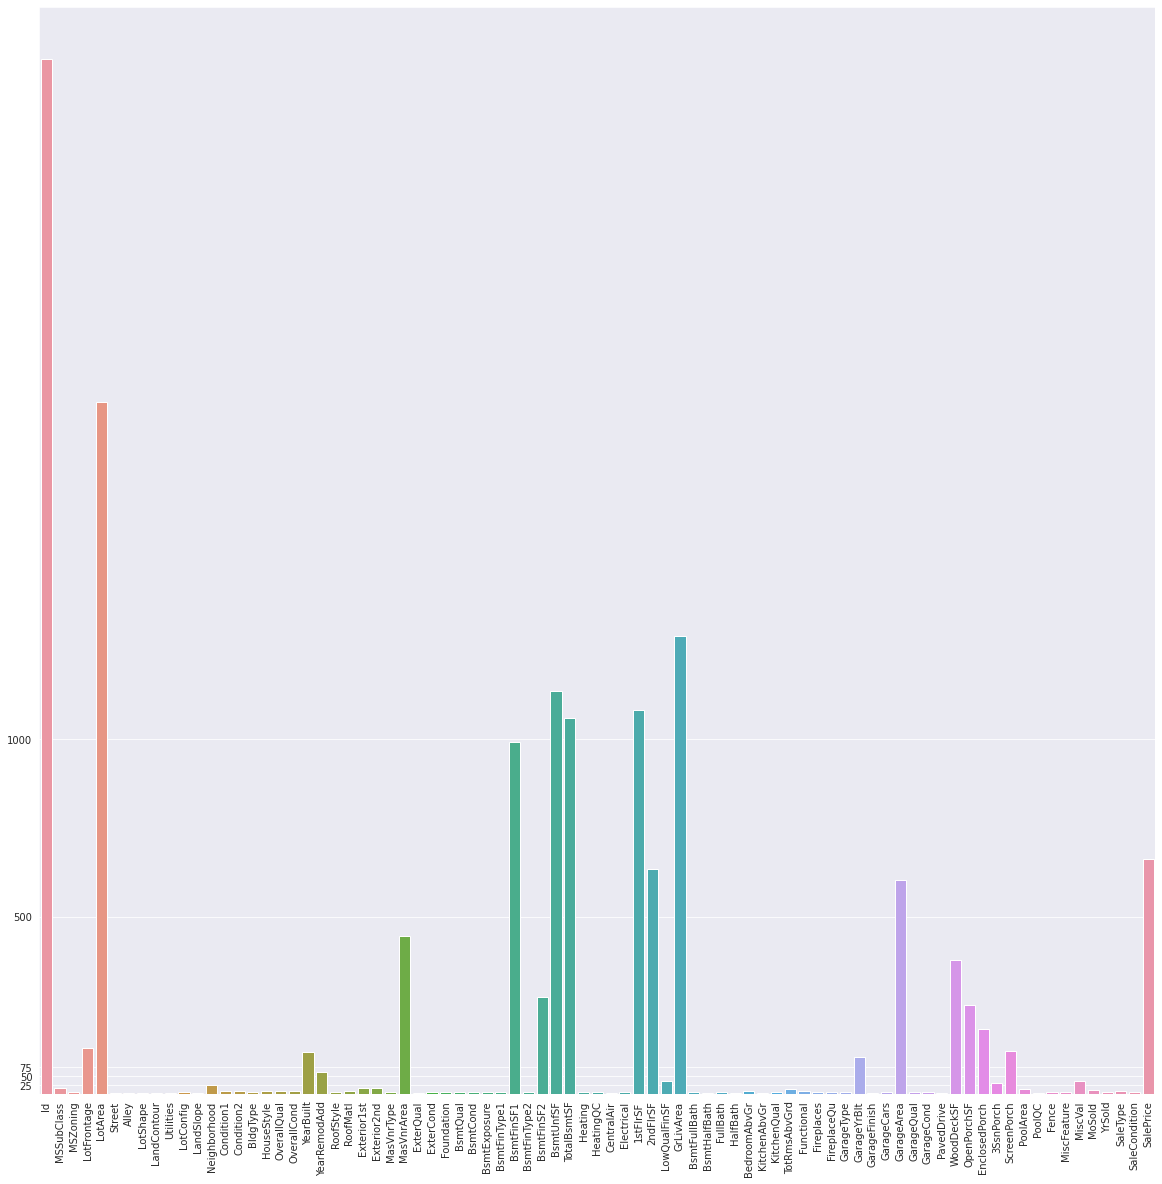

In [7]:
unique_len = []
for column in df1:
    unique_len.append( len(df1[column].unique()) )
    
plt.figure(figsize=(20,20))    
sns.barplot(x=df1.columns, y=unique_len)
plt.yticks(np.array([25,50,75, 500, 1000]))
plt.xticks(rotation=90)

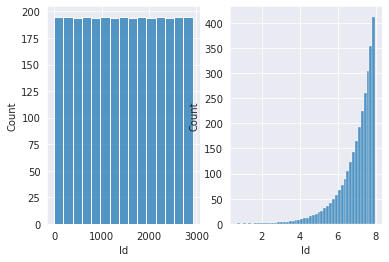

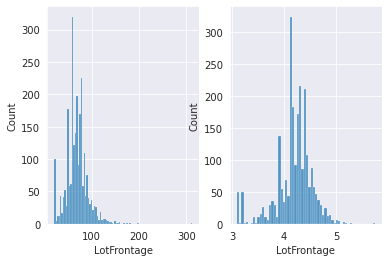

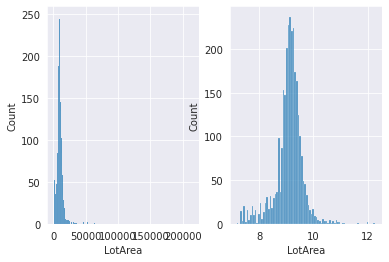

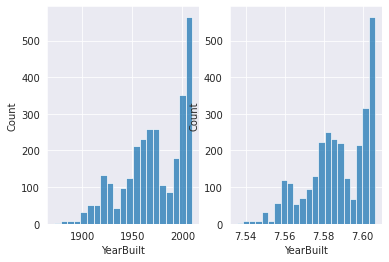

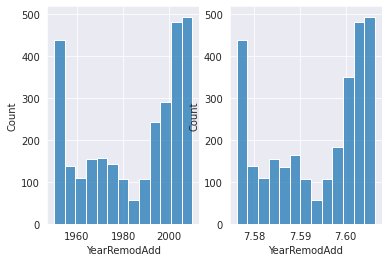

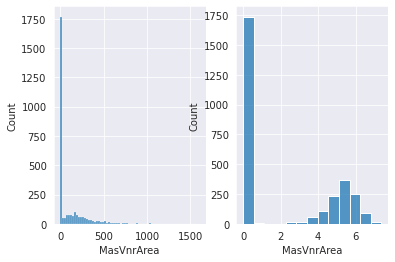

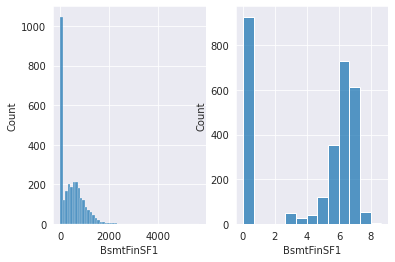

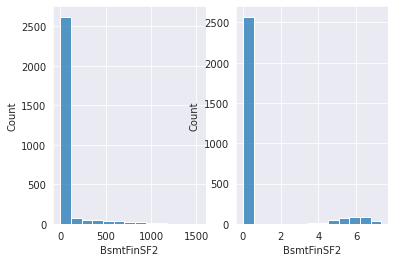

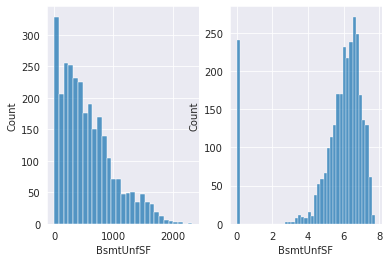

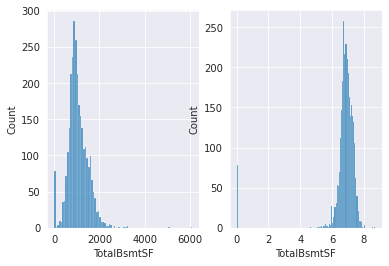

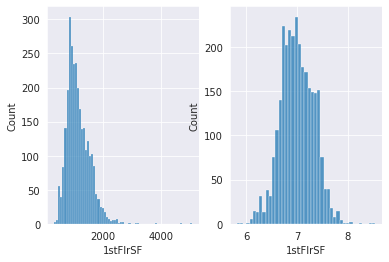

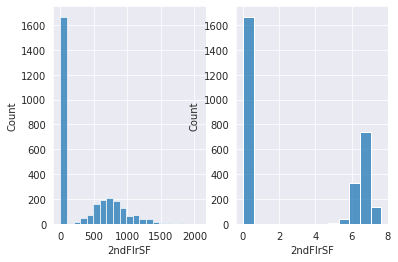

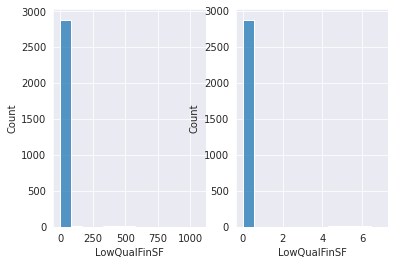

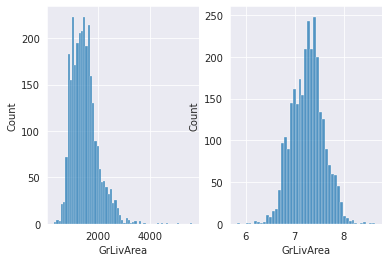

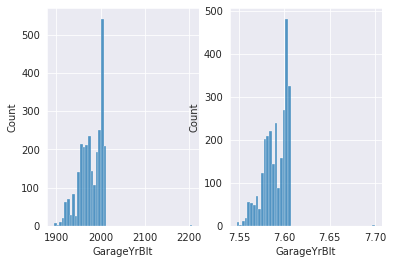

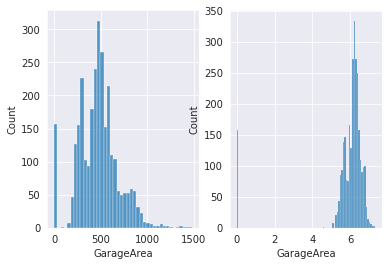

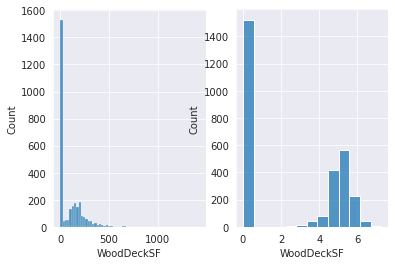

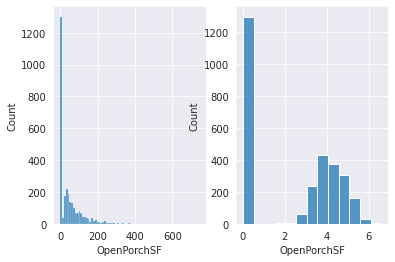

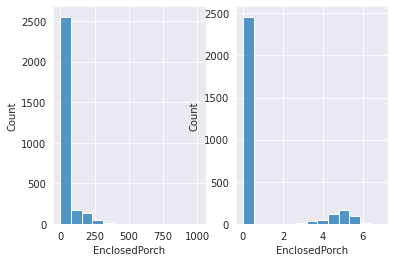

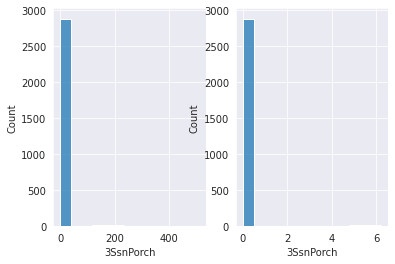

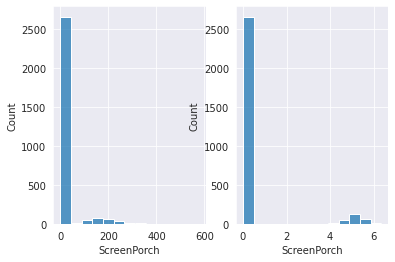

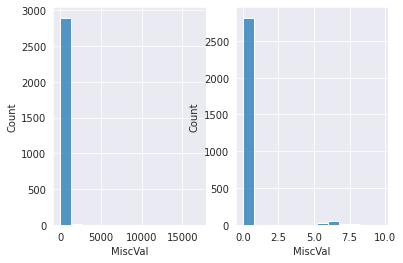

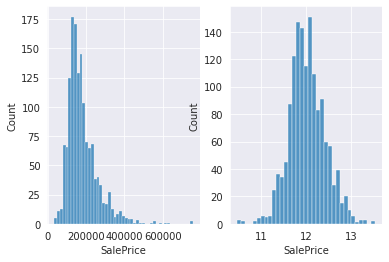

In [8]:
for column in df1:
    if len(df1[column].unique()) > 25:
        plt.show()
        plt.subplot(1,2,1)
        sns.histplot(df1[column])
        plt.subplot(1,2,2)
        sns.histplot(np.log1p(df1[column]))

In [9]:
(df1.isna().sum() *100 / df1.isna().count()).sort_values(ascending=False)[:21]

SalePrice       49.982871
LotFrontage     16.649538
GarageYrBlt      5.447071
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
Utilities        0.068517
Functional       0.068517
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
Exterior1st      0.034258
TotalBsmtSF      0.034258
GarageCars       0.034258
Exterior2nd      0.034258
BsmtFinSF1       0.034258
GarageArea       0.034258
BsmtUnfSF        0.034258
BsmtFinSF2       0.034258
KitchenQual      0.034258
Electrical       0.034258
SaleType         0.034258
dtype: float64

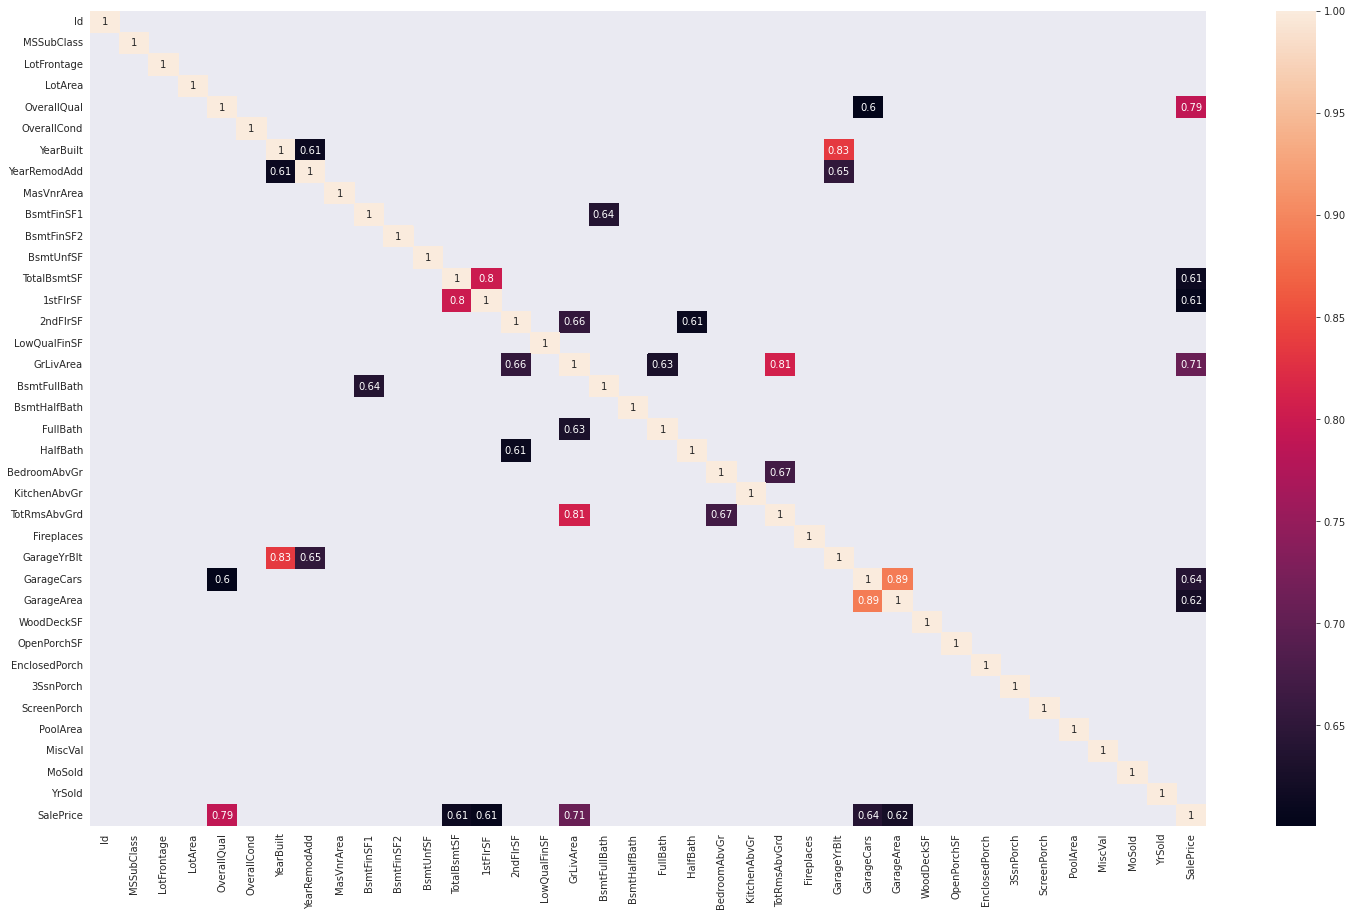

In [10]:
plt.figure(figsize=(25,15))
corr = df1.corr()
sns.heatmap( corr[(corr<-0.6) | (corr>0.6)], annot=True)

In [11]:
df2 = df1.copy()

In [12]:
# Filling NaN values
for column in df2:
    if df2[column].dtype != 'O':
        if column != 'SalePrice':
            if len(df2[column].unique()) > 25:
                df2[column] = df2[column].fillna(df2[column].median())
            else:
                df2[column] = df2[column].fillna(df2[column].mode()[0])
    else:
        df2[column] = df2[column].fillna(df2[column].mode()[0])

In [13]:
df2 = df2.drop(['GarageYrBlt', 'GarageCars'], axis='columns')

In [14]:
# Filled NaN test data
test1 = df2[1460:].copy()
test1 = test1.reset_index(drop=True)

In [15]:
# Outlier Removing
df3 = pd.DataFrame()
for column in df2:
    if df1[column].dtype != 'O':
        if len(df2[column].unique()) > 500:
            Q1 = df2[column].quantile(0.25)
            Q3 = df2[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_limit = Q1 - 2*IQR
            upper_limit = Q3 + 2*IQR
            df3[column] = df2[column][ (df2[column]>lower_limit) & (df2[column]<upper_limit) ]
        else:
            df3[column] = df2[column]
    else:
        df3[column] = df2[column]

In [16]:
(df3.isna().sum() * 100 / df3.isna().count()).sort_values(ascending=False)[:21]

SalePrice        51.284687
LotArea           3.254539
GrLivArea         0.890716
TotalBsmtSF       0.787941
1stFlrSF          0.787941
GarageArea        0.685166
BsmtUnfSF         0.274066
BsmtFinSF1        0.171292
FullBath          0.000000
Functional        0.000000
TotRmsAbvGrd      0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
BsmtHalfBath      0.000000
MoSold            0.000000
BsmtFullBath      0.000000
SaleType          0.000000
LowQualFinSF      0.000000
SaleCondition     0.000000
dtype: float64

In [17]:
df3

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450.0,Pave,aNo,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854,0,1710.0,1.0,0.0,2,1,3,1,Gd,8,Typ,0,aNo,Attchd,RFn,548.0,TA,TA,Y,0,61,0,0,0,0,aNo,aNo,aNo,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600.0,Pave,aNo,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0,0,1262.0,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,460.0,TA,TA,Y,298,0,0,0,0,0,aNo,aNo,aNo,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250.0,Pave,aNo,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866,0,1786.0,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608.0,TA,TA,Y,0,42,0,0,0,0,aNo,aNo,aNo,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550.0,Pave,aNo,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756,0,1717.0,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642.0,TA,TA,Y,0,35,272,0,0,0,aNo,aNo,aNo,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260.0,Pave,aNo,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053,0,2198.0,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836.0,TA,TA,Y,192,84,0,0,0,0,aNo,aNo,aNo,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936.0,Pave,aNo,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546.0,546,0,1092.0,0.0,0.0,1,1,3,1,TA,5,Typ,0,aNo,aNo,aNo,0.0,aNo,aNo,Y,0,0,0,0,0,0,aNo,aNo,aNo,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894.0,Pave,aNo,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546.0,546,0,1092.0,0.0,0.0,1,1,3,1,TA,6,Typ,0,aNo,CarPort,Unf,286.0,TA,TA,Y,0,24,0,0,0,0,aNo,aNo,aNo,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,NaN,Pave,aNo,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224.0,0,0,1224.0,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,Unf,576.0,TA,TA,Y,474,0,0,0,0,0,aNo,aNo,aNo,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441.0,Pave,aNo,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None

In [18]:
df4 = df3.copy()
import scipy.stats

In [19]:
np.abs(scipy.stats.skew(df3.MasVnrArea.dropna(axis='index')))

2.6135921295017983

In [20]:
# Log applied test data
test2 = test1.copy()

In [21]:
# Correcting Skewness
skewed_columns=[]
for column in df4:
    if df4[column].dtype != 'O':
        if len(df4[column].unique()) > 25:
            if column != 'SalePrice' and column != 'Id':
                if np.abs(scipy.stats.skew(df4[column].dropna(axis='index'))) > 0.5:
                    df4[column] = np.log1p(df4[column])
                    test2[column] = np.log1p(test2[column])
                    skewed_columns.append(column)

In [22]:
# Scaled Data
df5 = df4.copy()
test3 = test2.copy()

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [24]:
for column in df5:
    if df5[column].dtype != 'O':
        if column != 'SalePrice' and column != 'Id':
            scaler.fit(df5[[column]])
            df5[column] = scaler.transform(df5[[column]])
            test3[column] = scaler.transform(test3[[column]])

In [25]:
# Encoded data
df6 = df5.copy()
test4 = test3.copy()

In [26]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [27]:
for column in df6:
    if df6[column].dtype == 'O':
        encoder.fit( df6[[column]].dropna(axis='index') )
        df6[column] = encoder.transform( df6[[column]] )
        test4[column] = encoder.transform(test4[[column]])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
df6.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,0.067331,3,-0.040039,-0.255974,1,2,3,3,0,4,0,5,2,2,0,5,0.646183,-0.507284,1.040634,0.896833,1,1,12,13,1,1.222670,2,4,2,2,3,3,2,0.785734,5,-0.362565,-0.323995,-0.449605,1,0,1,4,-0.778903,1.196876,-0.116932,0.610315,1.087334,-0.249719,0.781366,1.232599,0.169927,-0.207698,2,0.986849,6,-0.924311,5,1,1,0.389299,4,4,2,-0.945126,0.832979,-0.427545,-0.112774,-0.309144,-0.06315,3,4,4,-0.189329,-1.552184,0.157646,8,4,208500.0
1,2,-0.873616,3,0.598801,0.085260,1,2,3,3,0,2,0,24,1,2,0,2,-0.063185,2.188279,0.161526,-0.395604,1,1,8,8,2,-0.793461,3,4,1,2,3,1,0,0.895005,5,-0.362565,0.016475,0.557866,1,0,1,4,0.462402,-0.863610,-0.116932,-0.356905,-0.818929,3.822508,0.781366,-0.756321,0.169927,-0.207698,3,-0.287758,6,0.623632,4,1,1,-0.037047,4,4,2,1.254212,-1.083169,-0.427545,-0.112774,-0.309144,-0.06315,3,4,4,-0.189329,-0.446925,-0.602962,8,4,181500.0
2,3,0.067331,3,0.098625,0.574856,1,2,0,3,0,4,0,5,2,2,0,5,0.646183,-0.507284,0.975922,0.848965,1,1,12,13,1,1.150372,2,4,2,2,3,2,2,0.660595,5,-0.362565,0.243125,-0.290791,1,0,1,4,-0.548373,1.201129,-0.116932,0.748777,1.087334,-0.249719,0.781366,1.232599,0.169927,-0.207698,2,-0.287758,6,0.623632,4,1,1,0.679990,4,4,2,-0.945126,0.663083,-0.427545,-0.112774,-0.309144,-0.06315,3,4,4,-0.189329,1.026753,0.157646,8,4,223500.0
3,4,0.302568,3,-0.285790,0.070424,1,2,0,3,0,0,0,6,2,2,0,5,0.646183,-0.507284,-1.869638,-0.682812,1,1,13,15,2,-0.793461,3,4,0,3,1,3,0,0.389224,5,-0.362565,0.360011,-0.697750,1,2,1,4,-0.408962,1.159720,-0.116932,0.623322,1.087334,-0.249719,-1.027363,-0.756321,0.169927,-0.207698,2,0.349546,6,0.623632,2,5,2,0.844715,4,4,2,-0.945126,0.580589,2.738802,-0.112774,-0.309144,-0.06315,3,4,4,-0.189329,-1.552184,-1.363569,8,0,140000.0
4,5,0.067331,3,0.749164,1.467997,1,2,0,3,0,2,0,15,2,2,0,5,1.355551,-0.507284,0.943542,0.753229,1,1,12,13,1,1.443082,2,4,2,2,3,0,2,0.760600,5,-0.362565,0.308033,0.267536,1,0,1,4,0.151242,1.260739,-0.116932,1.409750,1.087334,-0.249719,0.781366,1.232599,1.385655,-0.207698,2,1.624153,6,0.623632,4,1,1,1.784617,4,4,2,1.085318,0.979467,-0.427545,-0.112774,-0.309144,-0.06315,3,4,4,-0.189329,2.132012,0.157646,8,4,250000.0


In [29]:
train1 = df6.drop('Id', axis='columns')
train1 = train1.dropna(axis='index')
X = train1.drop('SalePrice', axis='columns')
y = train1.SalePrice

In [30]:
#from sklearn.preprocessing import PolynomialFeatures
#poly = PolynomialFeatures(degree=8)
#X = poly.fit_transform(X)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [32]:
from sklearn.linear_model import Ridge
ridge = Ridge()
from sklearn.linear_model import Lasso
lasso = Lasso()
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()

In [33]:
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.8725113859863186

In [34]:
gb.fit(X_train, y_train)
gb.score(X_test, y_test)

0.9063283408718755

In [35]:
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

0.8737060926610988

In [36]:
lin.fit(X_train, y_train)
lin.score(X_test, y_test)

0.8737351239920028

In [37]:
test5 = test4.drop(['Id', 'SalePrice'], axis='columns')
test5.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-0.873616,2,0.598801,0.685237,1,2,3,3,0,4,0,12,1,2,0,2,-0.772552,0.391237,-0.332070,-1.113625,1,1,12,13,2,-0.793461,3,4,1,3,3,3,4,0.647952,3,2.287158,-0.010523,-0.385087,1,4,1,4,-0.632888,-0.863610,-0.116932,-1.447106,-0.818929,-0.249719,-1.027363,-0.756321,-1.045801,-0.207698,3,-0.925062,6,-0.924311,5,1,2,1.271062,4,4,2,0.964198,-1.083169,-0.427545,-0.112774,2.976640,-0.06315,3,2,4,-0.189329,-0.078505,1.67886,8,4
1,-0.873616,3,0.637077,1.470074,1,2,0,3,0,0,0,12,2,2,0,2,-0.063185,0.391237,-0.431241,-1.257229,3,1,13,14,1,0.996811,3,4,1,3,3,3,0,0.875595,5,-0.362565,0.207464,0.724123,1,4,1,4,0.627850,-0.863610,-0.116932,-0.192225,-0.818929,-0.249719,-1.027363,1.232599,0.169927,-0.207698,2,-0.287758,6,-0.924311,5,1,2,-0.754085,4,4,2,1.360662,0.593309,-0.427545,-0.112774,-0.309144,-0.06315,3,4,0,7.418425,-0.078505,1.67886,8,4
2,0.067331,3,0.358727,1.340406,1,2,0,3,0,4,0,8,2,2,0,5,-0.772552,-0.507284,0.846305,0.657493,1,1,12,13,2,-0.793461,3,4,2,2,3,3,2,0.823846,5,-0.362565,-0.372248,-0.270940,1,2,1,4,-0.520690,1.136698,-0.116932,0.455802,-0.818929,-0.249719,0.781366,1.232599,0.169927,-0.207698,3,-0.287758,6,0.623632,4,1,0,0.069539,4,4,2,1.123361,0.567509,-0.427545,-0.112774,-0.309144,-0.06315,3,2,4,-0.189329,-1.183764,1.67886,8,4


In [38]:
gb.predict(test5)

array([128478.91253704, 155370.00391646, 183865.63920916, ...,
       168033.87139071, 127118.9585543 , 225057.79877613])

In [39]:
submission = pd.DataFrame()
submission['Id'] = test4.Id
submission['SalePrice'] = gb.predict(test5)
submission.to_csv('submission.csv', index=False)

In [40]:
X.shape

(1361, 77)

In [41]:
model = keras.Sequential([
    keras.layers.Dense(1361, input_shape=(77,), activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(1)
])

In [42]:
model.compile(optimizer="Adam",
              loss="mse",
              metrics=["mae"])

In [43]:
model.fit(X, y, epochs=1000)

Epoch 1/1000
43/43 [==============================] - 1s 7ms/step - loss: 32771493888.0000 - mae: 170054.8750
Epoch 2/1000
43/43 [==============================] - 0s 6ms/step - loss: 28313268224.0000 - mae: 156426.6406
Epoch 3/1000
43/43 [==============================] - 0s 6ms/step - loss: 14236753920.0000 - mae: 101141.9688
Epoch 4/1000
43/43 [==============================] - 0s 6ms/step - loss: 3721996288.0000 - mae: 45397.3828
Epoch 5/1000
43/43 [==============================] - 0s 7ms/step - loss: 2713106688.0000 - mae: 40426.2344
Epoch 6/1000
43/43 [==============================] - 0s 7ms/step - loss: 2340013056.0000 - mae: 36779.1406
Epoch 7/1000
43/43 [==============================] - 0s 6ms/step - loss: 2038882304.0000 - mae: 34263.0547
Epoch 8/1000
43/43 [==============================] - 0s 7ms/step - loss: 1760504192.0000 - mae: 31691.8887
Epoch 9/1000
43/43 [==============================] - 0s 6ms/step - loss: 1524806272.0000 - mae: 28963.1777
Epoch 10/1000
43/43 [=

In [44]:
model.predict(test5)

array([[140779.7 ],
       [157193.98],
       [187708.25],
       ...,
       [173839.23],
       [128675.74],
       [218631.23]], dtype=float32)

In [45]:
values = []
for value in model.predict(test5):
  values.append(value[0])

In [46]:
dl_answers = pd.DataFrame() # For Deep Learning answers besides of XG Boosting
dl_answers['Id'] = test4.Id
dl_answers['SalePrice'] = values

In [47]:
dl_answers.to_csv('answers.csv', index=False)